<a href="https://colab.research.google.com/github/ryandraper/neural-network-learning/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regresssion problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import a TensorFlow
import tensorflow as tf
print(tf.__version__)

2.11.0


## Creating data to view and fit


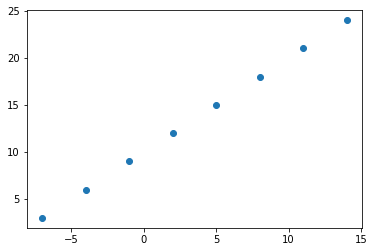

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [6]:
y ==X + 10


array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [8]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [10]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [11]:
X[0], y[0]

(-7.0, 3.0)

In [12]:
X[1], y[1]

(-4.0, 6.0)

In [13]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [14]:
X[0].ndim

0

In [15]:
X[0], y[0]

(-7.0, 3.0)

In [22]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [23]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape


(TensorShape([]), TensorShape([]))

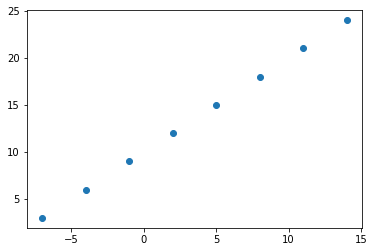

In [24]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (the function that tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evalutaion metris (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X&y (features and labels)

In [32]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model using hte Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# model.add(tf.keras.layers.Dense(1)) # other way of adding layer

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descent)
              metrics=["mae"]
              )

#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

#

Epoch 1/5
1/1 [==============================] - 0s 353ms/step - loss: 20.5212 - mae: 20.5212
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 20.2400 - mae: 20.2400
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 19.9587 - mae: 19.9587
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 19.6775 - mae: 19.6775
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 19.3962 - mae: 19.3962


In [26]:
# Check out x and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [29]:
# Try and make a prediction using our model
y_pred = model.predict([-4])
y_pred

1/1 [==============================] - 0s 79ms/step


array([[-0.69251907]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create our model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activiation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the  **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild our model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

In [36]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [37]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 76ms/step


array([[29.312895]], dtype=float32)

In [ ]:
# Let's rebuild our model

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1),
])

#2. Compile the model
model.compile(loss="mae", # other way of specifying loss function
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

changing to Adam and changing the learning rate actually gave me a worse result from the videos, but I'm using a newer version of tensorflow

In [49]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [59]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 92ms/step


array([[29.872576]], dtype=float32)

Looks like even though the loss and mae is better with this model but the result isn't actually better. This may be 'overfitting'

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Evaluating a model

In practice, a typical workflow you'll go through when building a neural network is:
`Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it`

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [60]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset